In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
matplotlib.style.use('seaborn-pastel')
np.set_printoptions(precision=3, suppress=True)

In [2]:
#Загружаем датасет
from google.colab import drive
drive.mount ('/content/drive')
# считываем файл
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/МГТУ/ВКР/Dataset_composites.csv')

Mounted at /content/drive


In [ ]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1017                         2.271346       1952.087902   
1018                         3.444022       2050.089171   
1019                         3.280604       1972.372865   
1020                         3.705351       2066.799773   
1021                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1017             912.855545                    86.992183   
1018             444.732634                   145.981978   
1019             416.836524                   110.533477   
1020             741.475517                   141.397963   
1021             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1017                        20.123249                324.774576   
1018                        19.599769                254.215401   
1019                        23.957502                248.423047   
1020                        19.246945                275.779840   
1021                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1017                     209.198700                             73.090961   
1018                     350.660830                             72.920827   
1019                     740.142791                             74.734344   
1020                     641.468152                             74.042708   
1021                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1017                    2387.292495               125.007669   
1018                    2360.392784               117.730099   
1019                    2662.906040               236.606764   
1020                    2071.715856               197.126067   
1021                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

Эксперименты с исходными данными

In [ ]:
# #   
# df['Содержание матрицы, %'] = df['Соотношение матрица-наполнитель'] / ((df['Соотношение матрица-наполнитель'] + 1) / 100)
# df['Содержание наполнителя, %'] = 100 - df['Содержание матрицы, %']
# # Эксперименты с использованием этих колонок не дали улучшения результатов

In [ ]:
# # У некоторых колонок непонятные единицы измерения (в частности: "%_2")
# # Предполагая, что это значения в квадрате, изменим их.
# df['Содержание эпоксидных групп,%_2'] = df['Содержание эпоксидных групп,%_2'] ** 0.5
# df['Содержание эпоксидных групп,%_2'].describe().T.round(2)
# # Эксперименты с использованием этих колонок не дали улучшения результатов

Эксперименты с модификацией исходных данных не дали положительных результатов, ни по анализу данных, ни по построенным моделям.
Для дальнейших построений моделей используем исходный датасет.

#Построение моделей

In [3]:
#Нормализация данных
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_norm = MinMaxScaler().fit_transform(np.array(df))
df_norm = pd.DataFrame(data = df_norm, columns = df.columns)

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

##Построение моделей для "Модуля упругости при растяжении"

In [5]:
# Задаем Х у
X = df_norm[['Соотношение матрица-наполнитель', 'Количество отвердителя, м.%', 
             'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
y = df_norm['Модуль упругости при растяжении, ГПа']

# X = df_norm[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
#              'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2', 
#              'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
# y = df_norm['Модуль упругости при растяжении, ГПа']

# X = df[['Соотношение матрица-наполнитель', 'Количество отвердителя, м.%', 
#              'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
# y = df['Модуль упругости при растяжении, ГПа']

# X = df[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
#              'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2', 
#              'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
# y = df['Модуль упругости при растяжении, ГПа']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

###Все модели для задачи регресии

In [6]:
models = [
    {'model': LinearRegression(), 
     'params': {'fit_intercept': [True, False], 'copy_X': [True, False]}},
    {'model': Ridge(), 
     'params': {'alpha': [0.1, 1, 10, 100],}},
    {'model': Lasso(), 
     'params': {'alpha': [0.1, 1, 10, 100],}},
    {'model': ElasticNet(), 
     'params': {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}},
    {'model': SVR(),
     'params': {'kernel': ['linear', 'rbf', 'sigmoid'],'C': [0.1, 1, 10, 100],'epsilon': [0.1, 0.2, 0.3],'gamma': ['scale', 'auto']}},
    {'model': RandomForestRegressor(), 
     'params': {'n_estimators': [10, 20, 30], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}},
    {'model': AdaBoostRegressor(), 
     'params': {'n_estimators': [10, 20, 30], 'learning_rate': [0.1, 1, 10], 'loss' : ['linear', 'square', 'exponential']}},
    {'model': GradientBoostingRegressor(), 
     'params': {'learning_rate': [0.1, 1, 10],'n_estimators': [10, 20, 30],'subsample' : [0.5, 0.8, 1.0],'max_depth': [3, 5, 7],'min_samples_split':[2, 5, 10],'min_samples_leaf':[1, 2, 4],'random_state': [42]}},
    {'model': DecisionTreeRegressor(),
     'params': {'max_depth' : range(1,50),'min_samples_split' : range(2,50),'min_samples_leaf' : range(1,50)}},
    {'model': XGBRegressor(),
     'params': {'learning_rate': [0.1, 1, 10],'n_estimators': [10, 20, 30],'subsample' : [0.5, 0.8, 1.0],'max_depth': [3, 5, 7],'min_child_weight':[1, 2, 4],'gamma':[0, 0.1, 0.5, 1],'random_state': [42]}},
    {'model': SGDRegressor(),
     'params': {'penalty': ['l1', 'l2', 'elasticnet'],'alpha': [0.0001, 0.001],'epsilon': [0.1, 0.2, 0.3],'learning_rate': ['constant', 'optimal', 'invscaling'], 'shuffle': [True, False], 'loss':['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}},
    {'model': BayesianRidge(),
     'params': {'n_iter': [100, 200, 300], 'tol': [0.001, 0.0001, 0.00001]}},
    {'model': KNeighborsRegressor(),
     'params': {'n_neighbors': [1, 3, 5], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree'], 'leaf_size': [20, 30, 40]}},
    ]

for model in models:
    print(model['model'].__class__.__name__)
    classifier = GridSearchCV(model['model'], model['params'], cv=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Best parameters:", classifier.best_params_)
    print(f'MSE:, {mean_squared_error(y_test, y_pred):.3f}')
    print(f'RMSE:, {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}')
    print(f'MAE:, {mean_absolute_error(y_test, y_pred):.3f}')
    print(f'R2:, {r2_score(y_test, y_pred):.3f}')
    print("===")  

LinearRegression
Best parameters: {'copy_X': True, 'fit_intercept': True}
MSE:, 0.029
RMSE:, 0.169
MAE:, 0.139
R2:, -0.012
===
Ridge
Best parameters: {'alpha': 10}
MSE:, 0.028
RMSE:, 0.169
MAE:, 0.139
R2:, -0.007
===
Lasso
Best parameters: {'alpha': 0.1}
MSE:, 0.028
RMSE:, 0.169
MAE:, 0.138
R2:, -0.008
===
ElasticNet
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
MSE:, 0.028
RMSE:, 0.169
MAE:, 0.138
R2:, -0.008
===
SVR
Best parameters: {'C': 0.1, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'sigmoid'}
MSE:, 0.029
RMSE:, 0.169
MAE:, 0.139
R2:, -0.012
===
RandomForestRegressor
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}
MSE:, 0.029
RMSE:, 0.169
MAE:, 0.138
R2:, -0.011
===
AdaBoostRegressor
Best parameters: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 30}
MSE:, 0.029
RMSE:, 0.170
MAE:, 0.140
R2:, -0.019
===
GradientBoostingRegressor
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samp

##Построение моделей для "Прочности при растяжении"

In [ ]:
# Задаем Х у
# X = df_norm[['Соотношение матрица-наполнитель', 'Количество отвердителя, м.%', 
#              'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
# y = df_norm['Прочность при растяжении, МПа']

# X = df_norm[[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
#              'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2', 
#              'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]]
# y = df_norm['Прочность при растяжении, МПа']

# X = df[['Соотношение матрица-наполнитель', 'Количество отвердителя, м.%', 
#         'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
# y = df['Прочность при растяжении, МПа']

X = df[[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
         'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2', 
         'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]]
y = df['Прочность при растяжении, МПа']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
models = [
    {'model': LinearRegression(), 
     'params': {'fit_intercept': [True, False], 'copy_X': [True, False]}},
    {'model': Ridge(), 
     'params': {'alpha': [0.1, 1, 10, 100],}},
    {'model': Lasso(), 
     'params': {'alpha': [0.1, 1, 10, 100],}},
    {'model': ElasticNet(), 
     'params': {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}},
    {'model': SVR(),
     'params': {'kernel': ['linear', 'rbf', 'sigmoid'],'C': [0.1, 1, 10, 100],'epsilon': [0.1, 0.2, 0.3],'gamma': ['scale', 'auto']}},
    {'model': RandomForestRegressor(), 
     'params': {'n_estimators': [10, 20, 30], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}},
    {'model': AdaBoostRegressor(), 
     'params': {'n_estimators': [10, 20, 30], 'learning_rate': [0.1, 1, 10], 'loss' : ['linear', 'square', 'exponential']}},
    {'model': GradientBoostingRegressor(), 
     'params': {'learning_rate': [0.1, 1, 10],'n_estimators': [10, 20, 30],'subsample' : [0.5, 0.8, 1.0],'max_depth': [3, 5, 7],'min_samples_split':[2, 5, 10],'min_samples_leaf':[1, 2, 4],'random_state': [42]}},
    {'model': DecisionTreeRegressor(),
     'params': {'max_depth' : range(1,50),'min_samples_split' : [2, 5, 10, 20, 30, 40, 50],'min_samples_leaf' : [1, 5, 10, 20, 30, 40, 50]}},
    {'model': XGBRegressor(),
     'params': {'learning_rate': [0.1, 1, 10],'n_estimators': [10, 20, 30],'subsample' : [0.5, 0.8, 1.0],'max_depth': [3, 5, 7],'min_child_weight':[1, 2, 4],'gamma':[0, 0.1, 0.5, 1],'random_state': [42]}},
     {'model': SGDRegressor(),
     'params': {'penalty': ['l1', 'l2', 'elasticnet'],'alpha': [0.0001, 0.001],'epsilon': [0.1, 0.2, 0.3],'learning_rate': ['constant', 'optimal', 'invscaling'], 'shuffle': [True, False], 'loss':['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}},
    {'model': BayesianRidge(),
     'params': {'n_iter': [100, 200, 300], 'tol': [0.001, 0.0001, 0.00001]}},
    {'model': KNeighborsRegressor(),
     'params': {'n_neighbors': [1, 3, 5], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree'], 'leaf_size': [20, 30, 40]}},
]
for model in models:
    print(model['model'].__class__.__name__)
    classifier = RandomizedSearchCV(model['model'], model['params'], cv=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    # print(y_pred)
    print("Best parameters:", classifier.best_params_)
    print(f'MSE:, {mean_squared_error(y_test, y_pred):.3f}')
    print(f'RMSE:, {mean_squared_error(y_test, y_pred, squared=False):.3f}')
    print(f'MAE:, {mean_absolute_error(y_test, y_pred):.3f}')
    print(f'R2:, {r2_score(y_test, y_pred):.3f}')
    print("===")  

LinearRegression
Best parameters: {'fit_intercept': True, 'copy_X': True}
MSE:, 246854.187
RMSE:, 496.844
MAE:, 401.934
R2:, -0.040
===
Ridge
Best parameters: {'alpha': 100}
MSE:, 246774.405
RMSE:, 496.764
MAE:, 401.825
R2:, -0.040
===
Lasso
Best parameters: {'alpha': 10}
MSE:, 246830.304
RMSE:, 496.820
MAE:, 401.578
R2:, -0.040
===
ElasticNet
Best parameters: {'l1_ratio': 0.9, 'alpha': 10}
MSE:, 246217.731
RMSE:, 496.203
MAE:, 401.052
R2:, -0.037
===
SVR
Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.3, 'C': 100}
MSE:, 237948.121
RMSE:, 487.799
MAE:, 392.313
R2:, -0.003
===
RandomForestRegressor
Best parameters: {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3}
MSE:, 243090.450
RMSE:, 493.042
MAE:, 396.795
R2:, -0.024
===
AdaBoostRegressor
Best parameters: {'n_estimators': 30, 'loss': 'linear', 'learning_rate': 0.1}
MSE:, 245887.373
RMSE:, 495.870
MAE:, 397.923
R2:, -0.036
===
GradientBoostingRegressor
Best parameters: {'subsample':

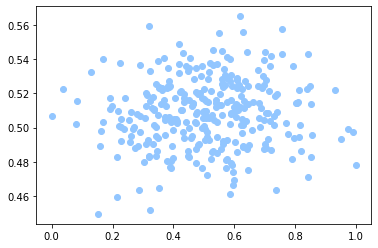

In [ ]:
plt.scatter(y_test, y_pred)

Построили 13 моделей регрессии для каждого таргета, в том числе линейную регрессию, ридж, лассо, эластик-нет, опорный векторный регрессор, случайный лес, адаптивный бустинг, градиентный бустинг, решающее дерево, XGBoost... 
Для каждой модели перебирается несколько гиперпараметров, заданных в словаре `params`. После вызова `GridSearchCV`, функция `fit` используется для подгонки модели к данным и поиска наилучших параметров для данной модели. Затем используется полученная модель для получения прогнозов на тестовых данных. Выводим ошибки (метрики). 
Комментарии:
SVR, DecisionTreeRegressor очень долго обучаются.

In [ ]:
#сохраняем модель
import pickle
pickle.dump(classifier, open('/content/drive/MyDrive/Colab Notebooks/МГТУ/ВКР/lr_model.pkl', 'wb'))